<a href="https://colab.research.google.com/github/ironchi/DAND_Analyze_ab_test_results/blob/master/Analyze_ab_test_results_notebook_(Fhd).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze A/B Test Results   (DAND project 3: Fahad Alnuaimi)

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed Ato assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [7]:
# read from csv file and save in datafeame 
# see the head of dataframe
df = pd.read_csv('/content/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [8]:
# see the datatypes of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [9]:
# see number of rows and columns 
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [10]:
# get number of unique users 
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [11]:
# count converted and non converted 
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [12]:
# save converted in variable
sumofconv = sum(df['converted'] == 1)
print(sumofconv)
# save not converted in variable
sumofnoconv = sum(df['converted'] == 0)
print(sumofnoconv)

35237
259241


In [13]:
# sumation and save in variable 
totalconv = sumofconv + sumofnoconv

In [14]:
# proportion of users converted
proportion_of_converted = sumofconv / totalconv *100
print('proportion of users converted is %', round(proportion_of_converted, 2))

proportion of users converted is % 11.97


e. The number of times the `new_page` and `treatment` don't match.

In [15]:
# get count number of no match between newpage and treatment 
dontmatch = df.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page")') ['user_id'].count()

In [16]:
dontmatch

3893

f. Do any of the rows have missing values?

In [17]:
# check of any row has missing value
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [18]:
# create new dataframe named df2
df2 = df

In [19]:
# find the does not match pages where are new pages mot match 
df2.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page")') ['user_id'].count()

3893

In [20]:
# find the does not match pages where are new pages mot match 
df2.query('(group == "control" & landing_page != "old_page") | (group != "control" & landing_page == "old_page")') ['user_id'].count()

3893

In [21]:
# save all not match pages variable by index 
tobedeleteindex = df2.query('(group == "treatment" & landing_page != "new_page") | (group != "treatment" & landing_page == "new_page") | (group == "control" & landing_page != "old_page") | (group != "control" & landing_page == "old_page")').index

In [22]:
# drop the not match pages
df2.drop(tobedeleteindex , inplace=True)

In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?     //// this need to be fixed later 

In [25]:
# find the dupllicated user id 
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [26]:
# retrive the duplicated rows user id 773192
df2.query('user_id==773192').head() 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [27]:
# save one of the rows in one variable 
deleteduplicatedrow = df2.query('user_id==773192' and 'timestamp=="2017-01-14 02:55:59.590927"').index

In [28]:
# select the row saved in the variable 
deleteduplicatedrow

Int64Index([2893], dtype='int64')

In [29]:
# drop the duplicated row 
df2.drop(deleteduplicatedrow, inplace=True)

In [30]:
# check if the row dropped 
df2.query('user_id==773192' and 'timestamp=="2017-01-14 02:55:59.590927"')

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [31]:
# devide converted over number of users to get the probability of converted 
round((df2.query(' converted == 1'))['user_id'].nunique()/(df2.shape[0]), 4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [32]:
# individual in control group and converted over all individuals in control group 
(df2.query('group == "control" and converted == 1')['user_id'].nunique())/(df2.query('group == "control"')['user_id'].nunique())

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [33]:
# individual in treatment group and converted over all individuals in control group 
(df2.query('group == "treatment" and converted == 1')['user_id'].nunique())/(df2.query('group == "treatment"')['user_id'].nunique())

0.11880806551510564

d. What is the probability that an individual received the new page?

In [34]:
# individuals recive new page over all users 
(df2.query('landing_page == "new_page"') ['user_id'].nunique())/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**the probability of conversion regardless of page received is 11.9%, with concider control group is 12%, on another way the group treatment has slightly same which 11.8%. While propbability of idividual recived new page is 50%. you can not be sure if it's the lead more conversion because the conversion rate of all users is 50%.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$p_{new}$** : for new pages 

& 

**$p_{old}$** : for old pages 



Null hypotheses is H0: **$p_{new}$** - **$p_{old}$** <= 0 


Alternative hypotheses is H1: **$p_{new}$** - **$p_{old}$** > 0


In this case at null new pages are less than equal old page untill we alternative prove that new pages are better.
By computing the type I error we decide wether reject the null or faild to reject the null.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [35]:
# Converted individual converted users under the null for new pages
p_new = round(df2.query('converted == 1')['user_id'].nunique() / df2['user_id'].nunique(), 4)
p_new

0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [36]:
# Converted individual converted users under the null for old pages
p_old = round(df2.query('converted == 1')['user_id'].nunique() / df2['user_id'].nunique(), 4)
p_old

0.1196

In [37]:
# calculate the conversion rate between new page and old page
p_new - p_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [38]:
# number of individuals in treatment group 
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [39]:
# number of individuals in control group 
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [40]:
# simulate conversion with probability rate of p_new
new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
new_page_converted.mean()

0.8802215952102401

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
# simulate converted old pages in contol group under the null 
old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
old_page_converted.mean()

0.8797995511929182

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [42]:
# Compute the observed difference of new and old pages converted 
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.000422044017321932

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [43]:
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace= True)
    new_page_converted = np.random.choice([0,1], n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1], n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
       

In [44]:
# Store to numpy array 
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

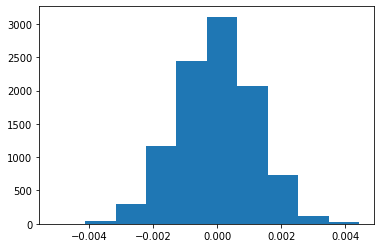

In [45]:
# Plot the spread into histogran, it looks normal distribution  
plt.hist(p_diffs);

The plot show spread of data is normal distribution 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [46]:
# get the actual defrence of treatment and control group in df2 
acttual_diffs = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()


In [47]:
# get the proportion of the p_diffs are greater than the actual difference observed 
(p_diffs > acttual_diffs).mean()

0.9018

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value that we got after compairing the differences scientaficly called P-value which is calculate the proportion of null values that are considered extreme based on the alternative. This value can deterimatin wether we reject the null or fail to reject the null. Based on significance level (alpha) that we spcified for type I error whcih is 5% we decide that study fail to reject the null hypothsis. The new pages are less than equal old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
# view the head of dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [49]:
# Compute the values for z_test and p_value 
# the results can be compaire to check wether our statstecs are true or not 

# Import the state for z model 
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


convert_old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [50]:
# Compute the z_test and p_value 
z_score, pval = proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, pval)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**For this computed value you can predict the degree of risk related to our assumption in frist phase by defining the null and the alternative. As what has been givin as results of conversion rate between old and new page, the z- score show value of -1.3 and p-value show 0.9. So when P-vale with confidience level 95% which show value higher than 0.05 and z-score between -1.96 and +1.96, you fail to reject the null hypothosis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**With only two outcomes (Conversion and no Coversion), 
We choose Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
# import stattical model 
import statsmodels.api as sm;
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [52]:
# Create the intercept and dummies  
df2['intercept'] = 1

df2[['dropdum', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('dropdum', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [53]:
# use logstic model 
Log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = Log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
# call for the redult methode 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        16:36:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**1- What is the p-value associated with ab_page, and why does it differ from the value you found in Part II?**

**For the p-vale associated with ab_page is 0.190, which is differ than Part III. The P-value from part II is differ because it was given form compairing between result of p-differ of bootstraping 10000 simulation and actual value, while in part III it was given from logitic regression and predection from dummies created from group column.**


**2- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in Part II?**

**In part II, the null hypotheses is higher than equal effect on converting users on old page more than new page. In part III, the null hypothesis has old page as the same as effectiveness on new page. For the alternative hypothesis, the new page is not equal to old page in part III. The p-vale in part III is is greater than the significance level, you cannot conclude that there is a statistically significant association between the response variable and the term.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We can add more factors to influence our study about convert or not converted users. The factors can be added in and influence; time, which study over time series can give you very good outcomes relate to the stud, and personal information related to users like age and level of education. The advantage of adding more factors are going to enrich understanding fo data that can help to give correct assumption. The Disadvantage is when adding more factors that may effect the coefficient estimates, andf that usually happen with multicollinearity case. Multicollinearity define as the case when there's high correlation between the terms.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

In [55]:
# read countries and save dataframe 
df_countries = pd.read_csv('/content/countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [56]:
# user inner join to select two dataframe by using user id as praimary key and save in one dataframe 
df2_countries_join = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner', sort= False)
df2_countries_join.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [57]:
# create dummies and drop frist colukn to make it as base intercept 
country_dummies = pd.get_dummies(df2_countries_join['country'], drop_first=True)
df_countries = df2_countries_join.join(country_dummies)
df_countries.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [58]:
# call for logistic model
# see the summary 
logit = sm.Logit(df_countries['converted'], df_countries[['intercept', 'UK', 'US']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        16:36:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
# interception results for p-value
np.exp(results.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

**From the result you can observe that p-value is higher than alpha of error type I 0.05 (%5).**

<a id='conclusions'></a>
## Conclusion:

**This study runs over A/B testing process to predect the outcomes of conversion between old page and new page. This type of testing usually use to compaire between two factors, If company want to deploy new page and want to determine wether new page has effect more than old page. We started with part one to check the data and apply probability of conversion, we have seen that conversion is faire. the part two was on applying hypotheses testing by produce assumptions of null and alternative, the null hypotheses assumption is new page has less than equal effect with old page. The alternative assumption is new page is higher than conversion rate than old page. Calucaltion of p-value and compaired with type I error lead to failure to reject the null hypotheses. To validate the outcome from hypotheses test we apply z- score test, which predict the degree of risk related to our assumption in frist phase by defining the null and the alternative. As what has been givin as results of conversion rate between old and new page, the z- score show value of -1.3 and p-value show 0.9. So when P-vale with confidience level 95% which show value higher than 0.05 and z-score between -1.96 and +1.96, this lead to failure to reject the null. For part three we have applies logitic regression model, which is one of the regression predection model to investigate the relationship between terms or factors to show if there's significant relation. The model show p-vale is 0.190 which is greater than compaired level of alpha, so statistically ther is not significant association between the response variable and the term. Then we assume if we add more fators to the model we can enhance the predection of relationship, we added countries data to the model and apply dummies to see if the country factor will effect conversion. From the result you can observe that p-value is higher than alpha of error type I (%5). Our recommendation is to keep the old page!.**

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255